In [3]:
import numpy as np
from scipy.fftpack import fft, ifft

fs = 1000
fl = 15.0/(fs)
fh = 45.0/(fs)
taps = 128
NX = 4000
NY = 4096

filter = np.zeros(NX, dtype = np.float32)

#generate bandpass filter
def sinc(x):
    if(x == 0):
        return 1
    return np.sin(np.pi*x)/(np.pi*x)

bp = np.zeros(NX)
for i in range(taps):
    n = i - int(taps/2)
    w = np.sin((np.pi * i)/(taps - 1)) * np.sin((np.pi*i)/(taps - 1))
    bp[i] = 2.0*fl*sinc(2.0*fl*n) - 2.0*fh*sinc(2.0*fh*n)
    bp[i] = w*bp[i]

#generate hilbert filter
h = np.zeros(NX)
for i in range(NX):
    if i == 0 or i==NX/2:
        h[i] = 1
    elif i<NX/2:
        h[i] = 2
    else:
        h[i] = 0

In [4]:
t = np.arange(0, NX/fs, 1/fs)
x = 10*np.sin(2*np.pi*5*t) + 20*np.sin(2*np.pi*30*t) + 15*np.sin(2*np.pi*60*t)
X = fft(x) 
BP = fft(bp)
# H = fft(h)
Y = np.empty(NX, dtype = np.complex)
for i in range(NX):
    Y[i] = X[i] * BP[i] * h[i]
y = ifft(Y, NX)

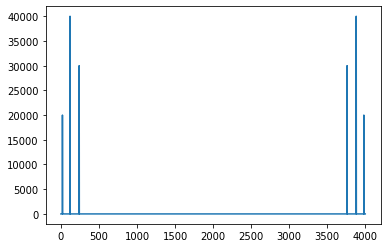

In [5]:
from matplotlib import pyplot as plt

plt.plot(np.abs(X))

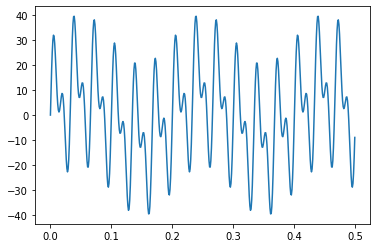

In [6]:
plt.plot(t[:500], x[:500])

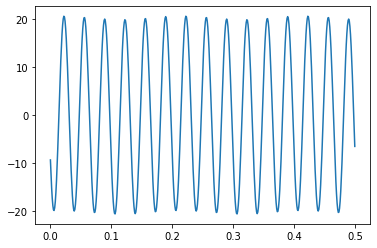

In [7]:
plt.plot(t[:500], y.real[:500])

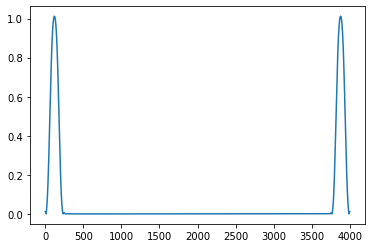

In [8]:
plt.plot(np.abs(BP))

# 生成测试数据

In [9]:
import numpy as np
from matplotlib import pyplot as plt

NX = 4000
fs = 1000
t = np.arange(0, NX/fs, 1/fs)
x = 10*np.sin(2*np.pi*5*t) + 20*np.sin(2*np.pi*30*t) + 15*np.sin(2*np.pi*60*t)
inputs = np.empty((4096, 4000), dtype = np.float32)
for i in range(4096):
    inputs[i] = x
np.savetxt("/home/hilbert/data/input_data.txt", inputs, fmt = '%.6f', delimiter=' ')

# 绘制滤波结果

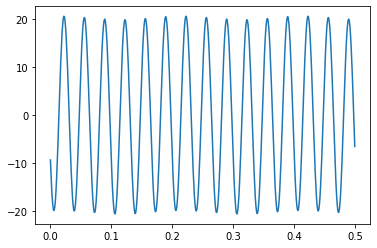

In [11]:
outputs = np.loadtxt("/home/hilbert/data/output_data.txt")
output = outputs[0]
plt.plot(t[:500], output[:500])